In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

In [4]:
data = pd.read_csv("728_data.csv")
data = data.set_index("Date")

t = np.array([1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 15.0, 20.0, 30.0])
yields = data.values

fitted = []
for date in data.index:
    y = data.loc[date].values
    curve, status = calibrate_ns_ols(t, y, tau0=1.0)
    assert status.success
    fitted.append(curve(t).tolist())
fitted = np.array(fitted)

/var/folders/jp/bc6syfnn06nd5vh0zytf1ry80000gn/T/ipykernel_28671/3474792785.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


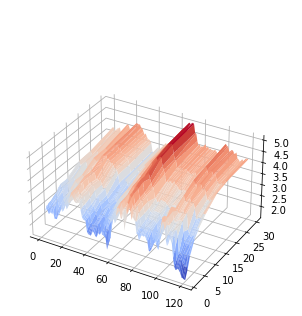

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
x = np.arange(1, 121)
y = t
X, Y = np.meshgrid(x, y)
Z = yields.T
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap("coolwarm"))
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.8, 0.7, 1]))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.view_init(32, -32)
plt.show()